## **Este notebook permite desarrollar un modelo de aprendizaje automatico de arboles de desición para la clasificación de hongos en comestibles y venenosos de acuerdo a algunas caracteristicas fenologicas.**

- Cristian Ubaldo Tirado Mircia

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Computervision/DesicionTree/mushrooms_original.csv', sep= ',')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [27]:
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data)
datos = pd.DataFrame(encoded_data, columns=data.columns)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(datos.drop('class', axis=1), datos['class'], test_size=0.3) #puse un valor de test de 30% a proposito, pues con un valor mas bajo el arbol da 100% de accuracy

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [41]:
predictions = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

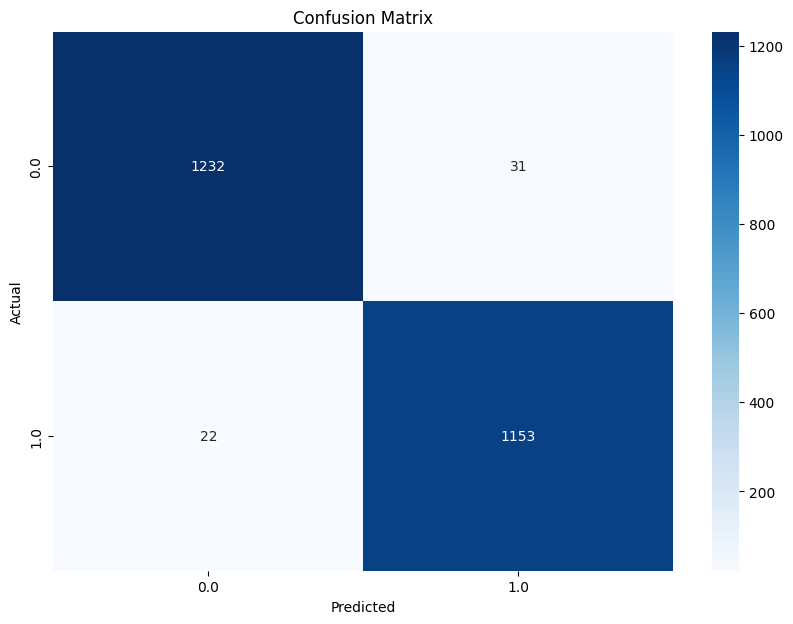

In [42]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
report = classification_report(y_test, predictions)

# Imprimir el informe de clasificación
print("Informe de Clasificación:")
print(report)

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1263
         1.0       0.97      0.98      0.98      1175

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [44]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9782608695652174


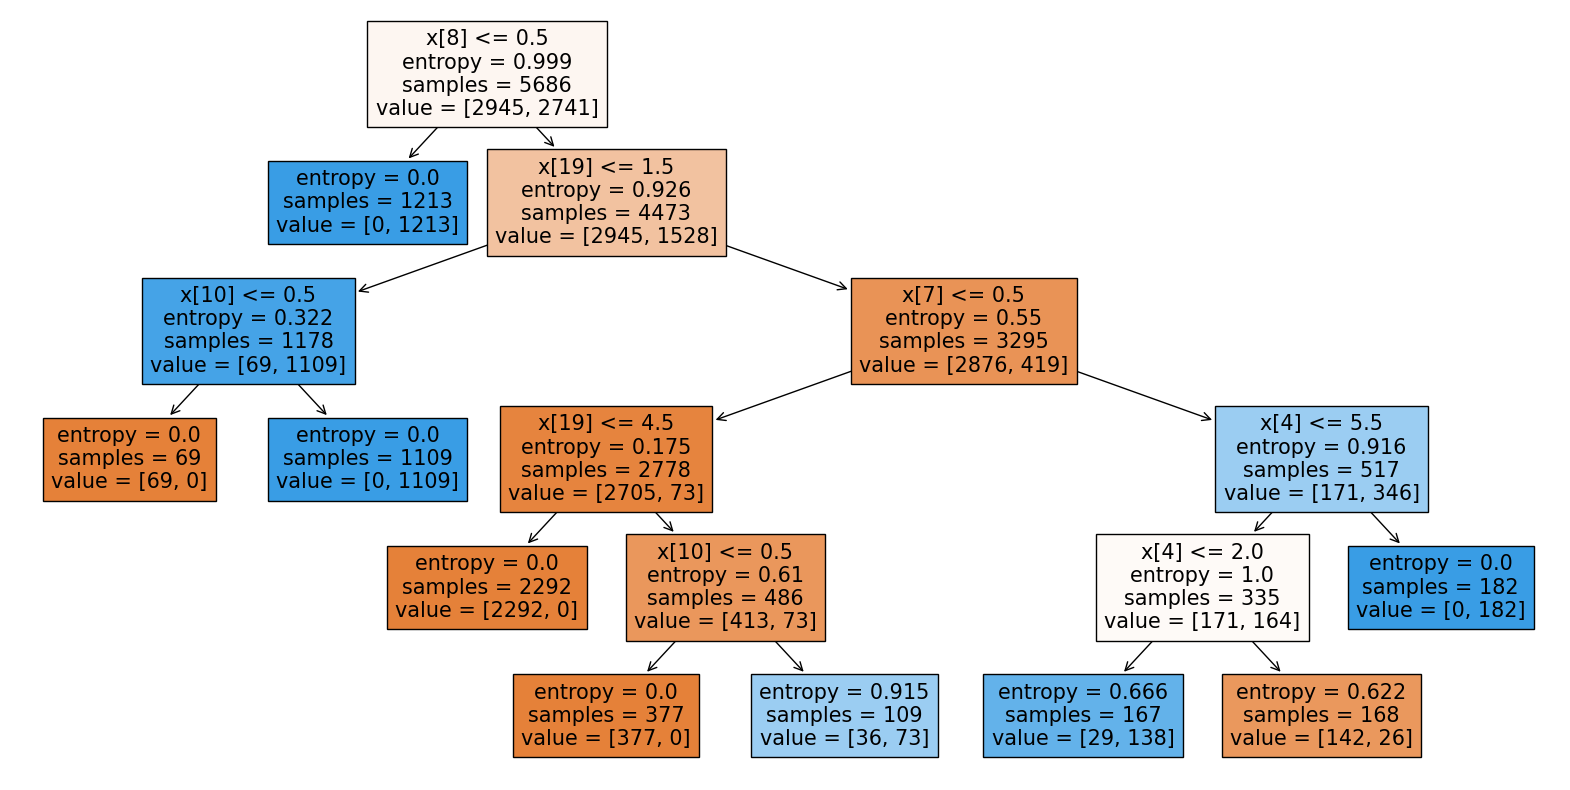

In [45]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
plt.show()